In [1]:
from pycaret.classification import *
import pandas as pd

In [ ]:
data = pd.read_csv(r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\modeling\modeling_data\onlyonehot\onlyonehot.csv",sep=";")
data.drop(columns="Unnamed: 0",inplace=True)
data

In [ ]:
# tag 데이터 불러오기 
tag_path = r"C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\merge_dataset\tag_merge.csv"
tag_df = pd.read_csv(tag_path)
tag_df

In [ ]:
# tag 데이터 binary 변환 
tag_df.iloc[:,1:] = tag_df.iloc[:,1:].astype("bool")
tag_df.iloc[:,1:] = tag_df.iloc[:,1:].astype("int")

In [ ]:
data = pd.merge(data,tag_df,how="inner",left_on="appid",right_on="appid")

In [ ]:
# tag 개수 컬럼 추가 
data["tag_num"] = tag_df.iloc[:,1:].sum(axis=1)

In [ ]:
# 모델 학습에 불필요한 컬럼 제거 
data.drop(columns=["genre","appid"],inplace=True)

In [12]:
# 정답지 분리 
X = data.drop(columns="Review")
y = data["Review"]

In [13]:
# train, validation 분리 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 1234, # 옵션, 재현성을 위함 
    stratify = y # 옵션 : 비율 나눌 때 비율 유지할지 말지 
)

In [14]:
# train 데이터 조정 : pycaret에서 target으로 y_train 지정을 위함
X_train["Review"] = y_train.to_list()

In [17]:
# pycaret classification 객체 생성 
exp = ClassificationExperiment()

In [18]:
# setup : stratified kfold, target 불균형 해결을 위한 SMOTE 사용(fix_imbalance) 
exp.setup(X_train, target='Review', session_id=123, fold_strategy="stratifiedkfold",fix_imbalance=True)

In [23]:
from sklearn.metrics import classification_report

In [ ]:
# 5개 베이스 모델 불러오기 
ada = load_model(r'C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\finaldata\ada_model_file')
rf = load_model(r'C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\finaldata\rf_model_file')
lgbm = load_model(r'C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\finaldata\lgbm_model_file')
et = load_model(r'C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\finaldata\et_model_file')
gbc = load_model(r'C:\Users\NT550-052\OneDrive\바탕 화면\ASAC\프로젝트\ML\web_crawling\CGW\finaldata\gbc_model_file')

In [29]:
# hyperparameter tuning : optuna

In [ ]:
c=y_test.replace("Positive",1).replace("Negative",0)

In [30]:
rf_tune = exp.tune_model(rf, search_library = 'optuna',n_iter = 20,choose_better = True)
b=rf_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(rf_tune, 'rf_tune_model')

\
                                                 
Initiated  . . . . . . . . . . . . . . . . . .   
Status     . . . . . . . . . . . . . . . . . .   
Estimator  . . . . . . . . . . . . . . . . . .   

                                            
                                            
Initiated                         15:05:03  
Status           Searching Hyperparameters  
Estimator  Light Gradient Boosting Machine

[I 2023-05-25 15:05:03,530] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 15:14:34,467] Finished hyperparemeter search!


              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.63      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.75      0.75      0.75      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                                 learning_rate=0.02819787899482023, max_depth=-1,
                                 min_child_samples=43, min_child_weight=0.001,
                                 min_split_gain=0.33545530702894366,
                                 n_estimators=219, n_jobs=-1, num_leaves=169,
                                 object

In [31]:
lgbm_tune = exp.tune_model(lgbm, search_library = 'optuna',n_iter = 20,choose_better = True)
b=lgbm_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(lgbm_tune, 'lgbm_tune_model')

Initiated  . . . . . . . . . . . . . . . . . .                   15:15:09
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .   Random Forest Classifier

[I 2023-05-25 15:15:09,694] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 16:00:29,320] Finished hyperparemeter search!


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                       

In [32]:
gbc_tune = exp.tune_model(gbc, search_library = 'optuna',n_iter = 20,choose_better = True)
b=gbc_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(gbc_tune, 'gbc_tune_model')

Initiated  . . . . . . . . . . . . . . . . . .              16:01:51
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

[I 2023-05-25 16:01:51,247] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 16:49:35,844] Finished hyperparemeter search!


              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.64      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.75      0.75      0.75      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                                             loss='log_loss', max_depth=11,
                                             max_features=0.7182933122785164,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=5.894982764878127e-09,
                                     

In [33]:
ada_tune = exp.tune_model(ada, search_library = 'optuna',n_iter = 20,choose_better = True)
b=ada_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(ada_tune, 'ada_tune_model')

Initiated  . . . . . . . . . . . . . . . . . .                   16:54:32
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .     Extra Trees Classifier

[I 2023-05-25 16:54:32,642] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 17:34:57,401] Finished hyperparemeter search!


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_imp

In [34]:
et_tune = exp.tune_model(et, search_library = 'optuna',n_iter = 20,choose_better = True)
b=et_tune.predict(X_test).astype("bool")
print(classification_report(c,b))

exp.save_model(et_tune, 'et_tune_model')

Initiated  . . . . . . . . . . . . . . . . . .              17:37:01
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

[I 2023-05-25 17:37:01,704] Searching the best hyperparameters using 25900 samples...
[I 2023-05-25 18:06:27,030] Finished hyperparemeter search!


              precision    recall  f1-score   support

           0       0.74      0.82      0.78      5367
           1       0.71      0.60      0.65      3884

    accuracy                           0.73      9251
   macro avg       0.72      0.71      0.71      9251
weighted avg       0.73      0.73      0.72      9251

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\NT550-~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['24_Hour_Peak', 'All_time_peak',
                                              'average_forever',
                                              'average_2weeks', 'median_forever',
                                              'median_2weeks...
                                                                               random_state=None,
                                                                               sampling_strategy='auto')))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                   

In [39]:
b=lgbm_tune.predict(X_test).astype("bool")
print("LGBM 튜닝 후")
print(classification_report(c,b))

LGBM 튜닝 후
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.63      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.75      0.75      0.75      9251



In [40]:
b=rf_tune.predict(X_test).astype("bool")
print("RF 튜닝 후")
print(classification_report(c,b))

RF 튜닝 후
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      5367
           1       0.74      0.59      0.66      3884

    accuracy                           0.74      9251
   macro avg       0.74      0.72      0.73      9251
weighted avg       0.74      0.74      0.74      9251



In [41]:
b=gbc_tune.predict(X_test).astype("bool")
print("GBC 튜닝 후")
print(classification_report(c,b))

GBC 튜닝 후
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5367
           1       0.74      0.64      0.68      3884

    accuracy                           0.75      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.75      0.75      0.75      9251



In [42]:
b=et_tune.predict(X_test).astype("bool")
print("ET 튜닝 후")
print(classification_report(c,b))

ET 튜닝 후
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      5367
           1       0.71      0.59      0.64      3884

    accuracy                           0.73      9251
   macro avg       0.72      0.71      0.71      9251
weighted avg       0.72      0.73      0.72      9251



In [43]:
b=ada_tune.predict(X_test).astype("bool")
print("ADA 튜닝 후")
print(classification_report(c,b))

ADA 튜닝 후
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      5367
           1       0.71      0.60      0.65      3884

    accuracy                           0.73      9251
   macro avg       0.72      0.71      0.71      9251
weighted avg       0.73      0.73      0.72      9251



In [ ]:
# feature importance

In [52]:
#lgbm
fi = pd.DataFrame([X_train.columns, lgbm_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"lgbm_feature",1:"lgbm_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

lgbm_feature lgbm_score
0    days_after_release       5117
1          achievements       2757
2               tag_num       2603
3                 price       2205
4              num_lang       1945
..                  ...        ...
500        Outbreak Sim          0
501              Sniper          0
502               Otome          0
503       Warhammer 40K          0
504              Review       None

[505 rows x 2 columns]

In [53]:
# rf
fi = pd.DataFrame([X_train.columns, rf_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"rf_feature",1:"rf_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

rf_feature  rf_score
0           All_time_peak  0.055622
1      days_after_release  0.052547
2            achievements  0.043848
3    months_after_release  0.039703
4                 tag_num  0.034483
..                    ...       ...
500              episodic       0.0
501           documentary       0.0
502                 Birds       0.0
503                 movie       0.0
504                Review      None

[505 rows x 2 columns]

In [54]:
# gbc
fi = pd.DataFrame([X_train.columns, gbc_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"gbc_feature",1:"gbc_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

gbc_feature gbc_score
0         All_time_peak  0.137231
1          achievements  0.054202
2                   dlc  0.045502
3    days_after_release  0.044888
4          24_Hour_Peak  0.037367
..                  ...       ...
500     videoproduction       0.0
501              Reboot       0.0
502                360v       0.0
503        Well-Written       0.0
504              Review      None

[505 rows x 2 columns]

In [55]:
# ada
fi = pd.DataFrame([X_train.columns, ada_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"ada_feature",1:"ada_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

ada_feature ada_score
0             adventure  0.145038
1                casual  0.076336
2    controller_support  0.061069
3          Singleplayer  0.045802
4               tag_num  0.038168
..                  ...       ...
500             Violent       0.0
501             windows       0.0
502        Hero Shooter       0.0
503            Medieval       0.0
504              Review      None

[505 rows x 2 columns]

In [56]:
# et

fi = pd.DataFrame([X_train.columns, et_tune.feature_importances_]).T.sort_values(by=1,ascending=False)
fi.rename(columns={0:"et_feature",1:"et_score"},inplace=True)
fi.reset_index(drop=True,inplace=True)
fi

et_feature  et_score
0      days_after_release  0.038695
1                 tag_num  0.029303
2    months_after_release  0.027682
3            achievements  0.027061
4           All_time_peak  0.023982
..                    ...       ...
500                 Birds       0.0
501              tutorial       0.0
502           documentary       0.0
503                 movie       0.0
504                Review      None

[505 rows x 2 columns]

In [ ]:
# soft voting

In [58]:
tune_blender = exp.blend_models([rf_tune,lgbm_tune,gbc_tune,et_tune,ada_tune])

Initiated  . . . . . . . . . . . . . . . . . .              18:27:24
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

In [59]:
tune_blender

VotingClassifier(estimators=[('Light Gradient Boosting Machine',
                              LGBMClassifier(bagging_fraction=0.8322661266697796,
                                             bagging_freq=7,
                                             boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             feature_fraction=0.9428537322514434,
                                             importance_type='split',
                                             learning_rate=0.02819787899482023,
                                             max_depth=-1, min_child_samples=43,
                                             min_child_weight=0.001,
                                             min_split_ga...
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=123, verbose=0,
                                                   warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [60]:
b=tune_blender.predict(X_test).astype("bool")
print("soft voting 후")
print(classification_report(c,b))

soft voting 후
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      5367
           1       0.75      0.63      0.68      3884

    accuracy                           0.76      9251
   macro avg       0.75      0.74      0.74      9251
weighted avg       0.76      0.76      0.75      9251



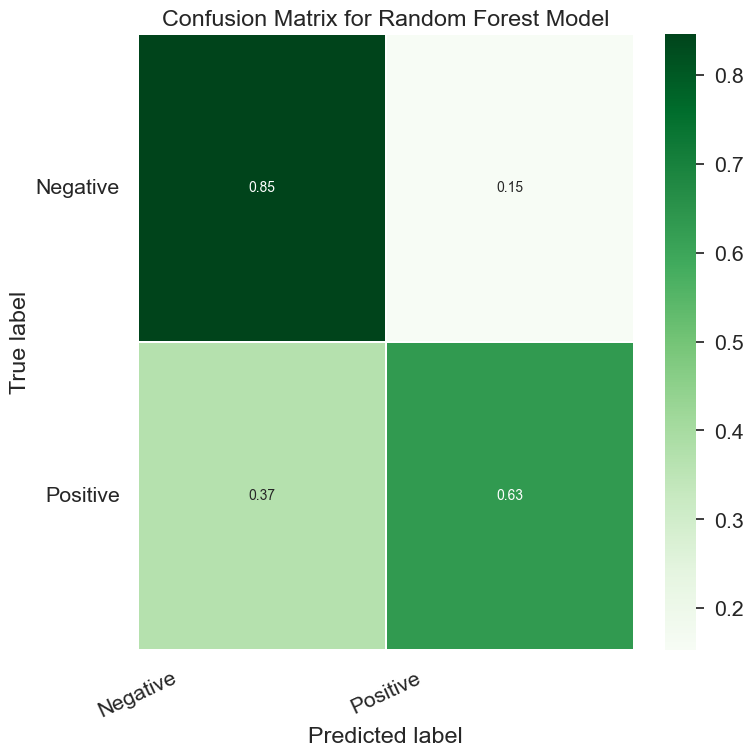

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get and reshape confusion matrix data
matrix = confusion_matrix(c, b)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)
# Add labels to the plot
class_names = ['Negative','Positive']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()